In [703]:
# from google.colab import drive
# drive.mount('/content/drive')

# **<font color=yellow > *Predicting  whether a patient is likely to get stroke or not using Decision tree algorithms:-* </font>**

## Importing the Needed libraries

In [704]:
# for data analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Imported all the libraries...")

Imported all the libraries...


## Import the Data .csv File and Read the File

In [705]:
# load the 1st raw data
df = pd.read_csv("/healthcare-dataset-stroke-data.csv")

# reading the data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [706]:
#reading the first 5 rows
print ("the default first 5 rows: -\n")
df.head()

the default first 5 rows: -



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [707]:
#reading the last 5 rows
print ("the default last 5 rows: -\n")
df.tail()

the default last 5 rows: -



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data Pre-processing

### **Exploratory Data Analysis**

#### Type of the dataframe

In [708]:
type(df)

pandas.core.frame.DataFrame

#### Shape of the Dataframe

In [709]:
# print the shape
dataframe_row_count, dataframe_column_count = df.shape
print('Row Count:', dataframe_row_count)
print('Column Count:', dataframe_column_count)

Row Count: 5110
Column Count: 12


In [710]:
# print the dimension
df.ndim

2

#### Concise Summary of Dataframe

In [711]:
#print a concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [712]:
#all the columns present in the dataframe
columns = list(df.columns)
columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [713]:
df.duplicated().sum()

0

In [714]:
#count of unique values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [715]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

*Gender needs to be categorized as a binary variable. And from the analysis perspective, it will be tedious to create another variable for one-row value (‘Others’). Hence, drop this single value in this column.*

In [716]:
# Drop the 'other' category in the gender column
other = df[df['gender'] == 'Other'].index
df.drop(other, axis=0, inplace= True)
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [717]:
# Age column
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

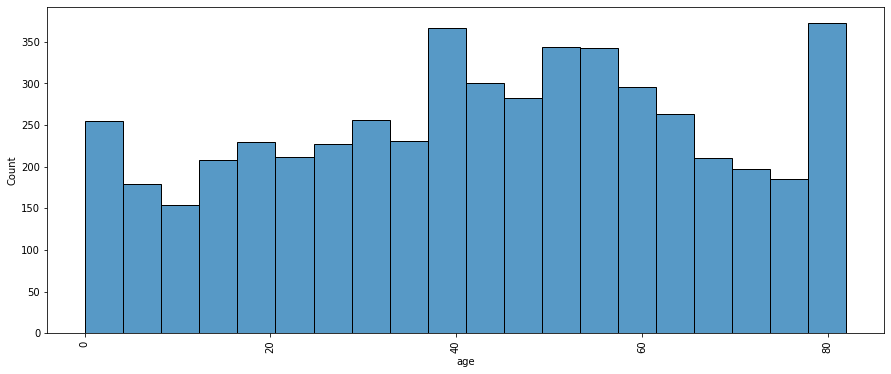

In [718]:
plt.figure(figsize=(15,6))
sns.histplot(df['age'])
plt.xticks(rotation=90)
plt.show()

In [719]:
# Hypertension column
df.hypertension.value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [720]:
# Heart disease column
df.heart_disease.value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [721]:
# Work type column
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

*687 records in this column are assigned under the 'children' category which is not a suitable work type.*

In [722]:
# Add values under children category to those of never worked category.
df.work_type = np.where(df['work_type'] == 'children','Never_worked',df.work_type)
df.work_type.value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

####Created 'age category' column

In [723]:
# Create 'age category' column.
conditions= [(df['age'] <= 14), 
                 (df['age'] >= 15) & (df['age'] <= 24),
                 (df['age'] >= 25) & (df['age'] <= 54),
                 (df['age'] >= 55) & (df['age'] <= 64),
                 (df['age'] >= 65)
]

values= ['Children','Early working age','Prime working age','Mature working age','Elderly']

#Create the new column
df['Age_Category']= np.select(conditions,values)

#Now we check if the new column is added
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Mature working age
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Prime working age
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [724]:
# Residence type column
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [725]:
# Smoking status column
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [726]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

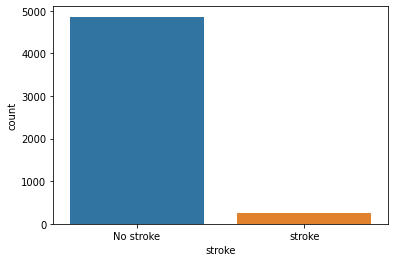

In [727]:
#Plotting the stroke column
g = sns.countplot(df['stroke'])
g.set_xticklabels(['No stroke','stroke'])
plt.show()

#### Checking the features

###### Numerical features

In [728]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']

print('Number of numerical variables: ',len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [729]:
for feature in numerical_features:
    print('* The feature is {} and number of numeric values is {}'.format(feature,len(df[feature].unique())))

* The feature is id and number of numeric values is 5109
* The feature is age and number of numeric values is 104
* The feature is hypertension and number of numeric values is 2
* The feature is heart_disease and number of numeric values is 2
* The feature is avg_glucose_level and number of numeric values is 3978
* The feature is bmi and number of numeric values is 419
* The feature is stroke and number of numeric values is 2


In [730]:
for feature in numerical_features:
    print('* The feature is {} and the values are {}'.format(feature,df[feature].unique()))

* The feature is id and the values are [ 9046 51676 31112 ... 19723 37544 44679]
* The feature is age and the values are [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.

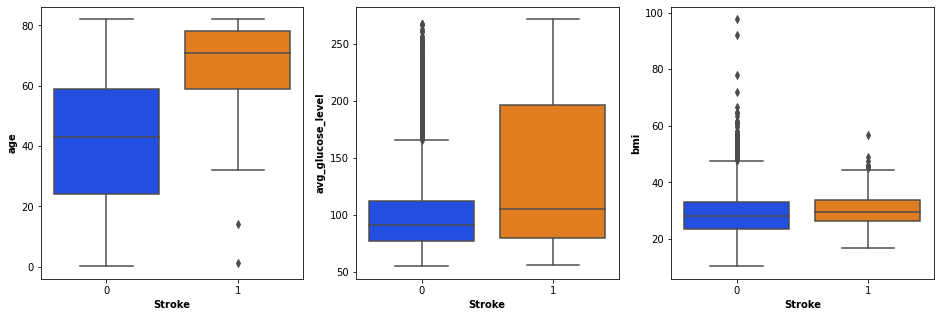

In [731]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i],  palette = 'bright')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn:

* age: Subjects with stroke tends to have higher mean age.
* avg glucose level: Subjects with stroke tends to have higher average glucose level.
* bmi: Some values in the BMI column made no sense. A mean BMI value of 12 is the lower limit for human survival and the maximum possible BMI is 50 which falls under the 'extremely obese' category. Hence BMI values less than 12 or more than 50 are considered outliers and should be dealt with.

In [732]:
bmi_outliers=df.loc[df['bmi'] > 50]
bmi_outliers['bmi'].shape

(79,)

In [733]:
bmi_outliers=df.loc[df['bmi'] < 12]
bmi_outliers['bmi'].shape

(3,)

*There are total 82 counts of outliers detected.*

In [734]:
df.drop(df.index[df['bmi'] > 50], inplace = True)
df.drop(df.index[df['bmi'] < 12], inplace = True)

In [735]:
df.shape

(5027, 13)

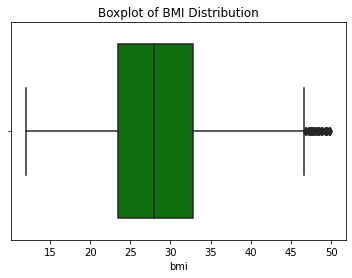

In [736]:
sns.boxplot(data=df,x=df["bmi"],color='green')
plt.title("Boxplot of BMI Distribution");

In [737]:
discrete_features= [feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete variables count: {}".format(len(discrete_features)))

df[discrete_features].head()

Discrete variables count: 3


,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


In [738]:
continuous_features= [feature for feature in numerical_features if feature not in discrete_features ]
print("Continuous variables count: {}".format(len(continuous_features)))

df[continuous_features].head()

Continuous variables count: 4


,id,age,avg_glucose_level,bmi
0,9046,67.0,228.69,36.6
1,51676,61.0,202.21,NaN
2,31112,80.0,105.92,32.5
3,60182,49.0,171.23,34.4
4,1665,79.0,174.12,24.0


###### Categorical features

In [739]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features: ',len(categorical_features))

df[categorical_features].head()

Number of categorical features:  6


,gender,ever_married,work_type,Residence_type,smoking_status,Age_Category
0,Male,Yes,Private,Urban,formerly smoked,Elderly
1,Female,Yes,Self-employed,Rural,never smoked,Mature working age
2,Male,Yes,Private,Rural,never smoked,Elderly
3,Female,Yes,Private,Urban,smokes,Prime working age
4,Female,Yes,Self-employed,Rural,never smoked,Elderly


In [740]:
for feature in categorical_features:
    print('* The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

* The feature is gender and number of categories are 2
* The feature is ever_married and number of categories are 2
* The feature is work_type and number of categories are 4
* The feature is Residence_type and number of categories are 2
* The feature is smoking_status and number of categories are 4
* The feature is Age_Category and number of categories are 5


In [741]:
for feature in categorical_features:
    print('* The feature is {} and number of categories are {}'.format(feature,df[feature].unique()))

* The feature is gender and number of categories are ['Male' 'Female']
* The feature is ever_married and number of categories are ['Yes' 'No']
* The feature is work_type and number of categories are ['Private' 'Self-employed' 'Govt_job' 'Never_worked']
* The feature is Residence_type and number of categories are ['Urban' 'Rural']
* The feature is smoking_status and number of categories are ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
* The feature is Age_Category and number of categories are ['Elderly' 'Mature working age' 'Prime working age' 'Children'
 'Early working age']


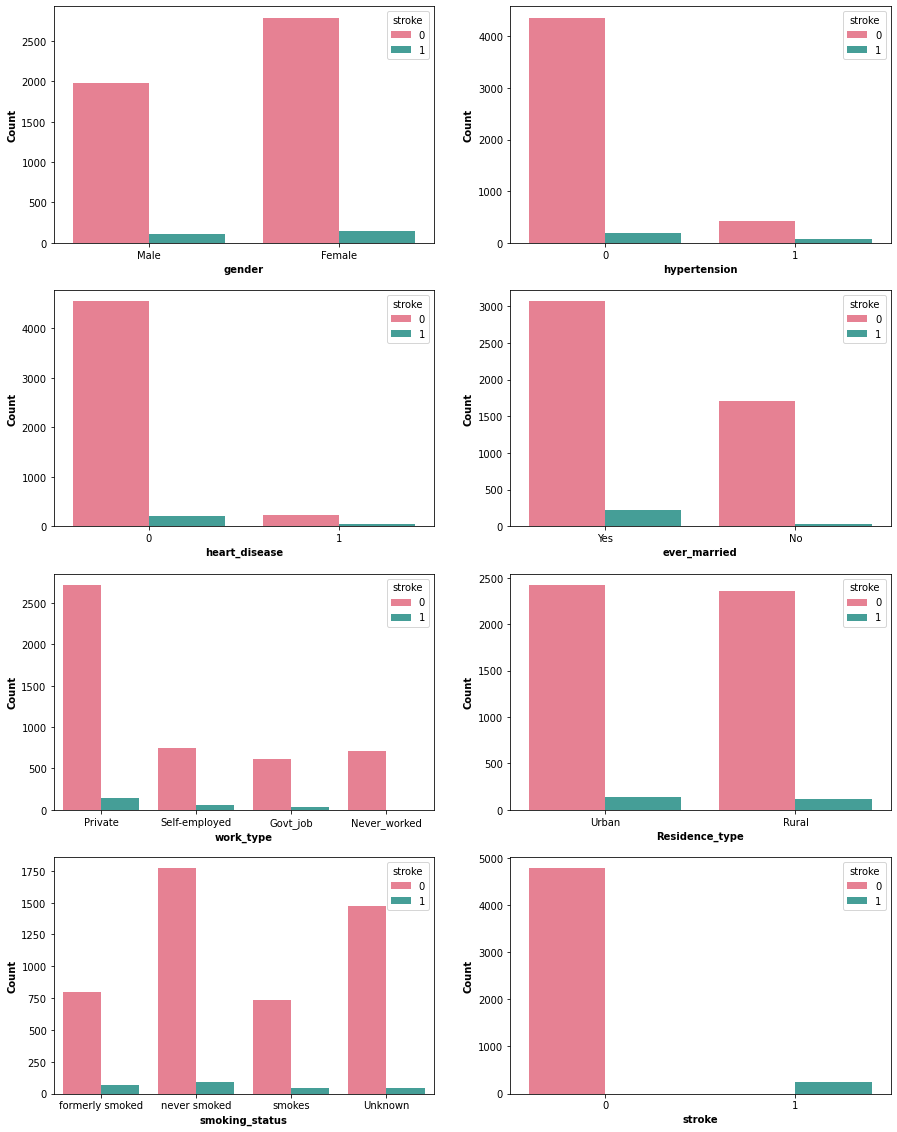

In [742]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(15,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = 'husl')
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

From the above count plot, some observations can be drawn:

* hypertension: Subjects that were previously diagnosed with hypertension have a high risk of having a stroke.
* heart disease: Subjects that were previously diagnosed with heart disease have a high risk of having a stroke.
* ever married: Subjects that ever married have a high risk of having a stroke.
* work type: Subjects that have any work experience and in government-related work have a high risk of having a stroke while those with no work experience barely experienced a stroke.
* Residence type: No obvious relationship with the likelihood of experiencing a stroke.
* smoking status: Being a smoker or former smoker increases the risk of having a stroke.

#### Missing Values

In [743]:
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
Age_Category         False
dtype: bool

In [744]:
for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

id 	 0.0% null values
gender 	 0.0% null values
age 	 0.0% null values
hypertension 	 0.0% null values
heart_disease 	 0.0% null values
ever_married 	 0.0% null values
work_type 	 0.0% null values
Residence_type 	 0.0% null values
avg_glucose_level 	 0.0% null values
bmi 	 4.0% null values
smoking_status 	 0.0% null values
stroke 	 0.0% null values
Age_Category 	 0.0% null values


In [745]:
# Checking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Age_Category           0
dtype: int64

* There are 201 missing values in BMI feature. A simple way to deal with the missing values is to remove the rows with null values however this may potentially remove data that aren’t null. Thus, I shall substitute missing values with the mean of bmi and check if imputations are done.*

In [746]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean().round(4))

In [747]:
# Checking for null values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age_Category         0
dtype: int64

#### Statistical Summary of Columns

In [748]:
# statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5027.0,36603.869107,21121.055580,67.00,17864.50,37029.00,54736.500,72940.00
age,5027.0,43.192910,22.723715,0.08,25.00,45.00,61.000,82.00
hypertension,5027.0,0.095683,0.294186,0.00,0.00,0.00,0.000,1.00
heart_disease,5027.0,0.054705,0.227425,0.00,0.00,0.00,0.000,1.00
avg_glucose_level,5027.0,105.899453,44.995000,55.12,77.25,91.85,113.865,271.74
bmi,5027.0,28.456653,6.859065,12.00,23.70,28.30,32.500,49.90
stroke,5027.0,0.049334,0.216585,0.00,0.00,0.00,0.000,1.00


In [749]:
df.median()

id                   37029.00
age                     45.00
hypertension             0.00
heart_disease            0.00
avg_glucose_level       91.85
bmi                     28.30
stroke                   0.00
dtype: float64

In [750]:
df.quantile(0.75) - df.quantile(0.25)

id                   36872.000
age                     36.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       36.615
bmi                      8.800
stroke                   0.000
dtype: float64

In [751]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.005827,0.003834,-0.002981,0.008180,0.018594,0.005342
age,0.005827,1.000000,0.279094,0.265262,0.236734,0.364506,0.246906
hypertension,0.003834,0.279094,1.000000,0.112075,0.170430,0.148636,0.131997
heart_disease,-0.002981,0.265262,0.112075,1.000000,0.166569,0.054296,0.135048
avg_glucose_level,0.008180,0.236734,0.170430,0.166569,1.000000,0.173446,0.133045
bmi,0.018594,0.364506,0.148636,0.054296,0.173446,1.000000,0.052624
stroke,0.005342,0.246906,0.131997,0.135048,0.133045,0.052624,1.000000


##### Heatmap

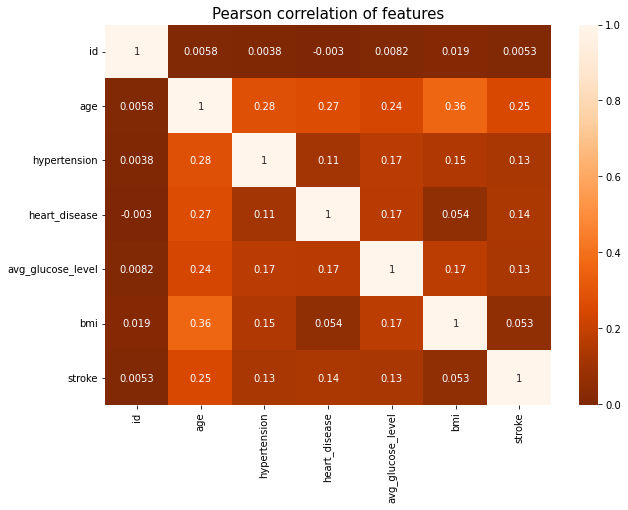

In [752]:
#checking the correlation of the data

plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),annot=True,cmap='Oranges_r')
plt.title('Pearson correlation of features',size=15)

plt.show()

#### Visualize the Dataset

##### Pairplot

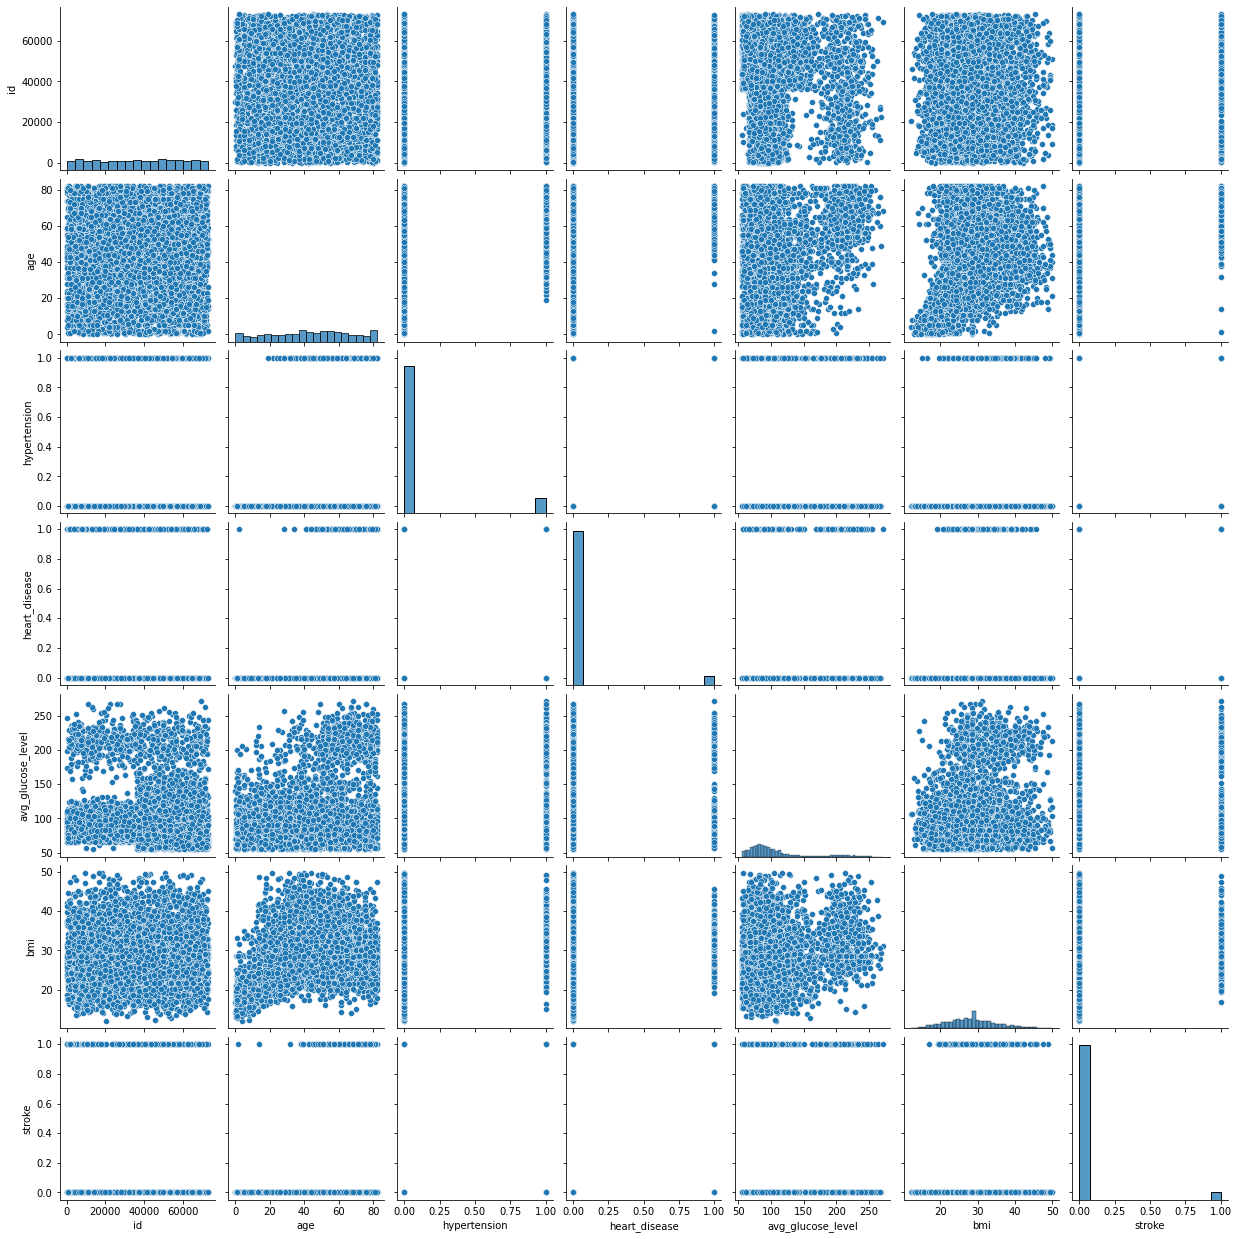

In [753]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df)

##### Pie Chart

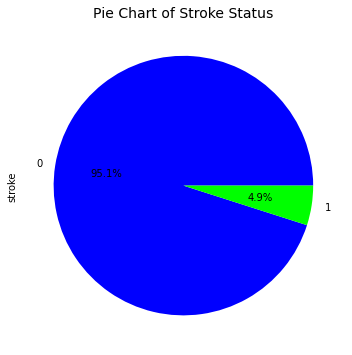

In [754]:
plt.figure(figsize=(5,7))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['blue','lime'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

*4.9% of the population in this dataset is diagnosed with stroke.*

##### Distribution plot

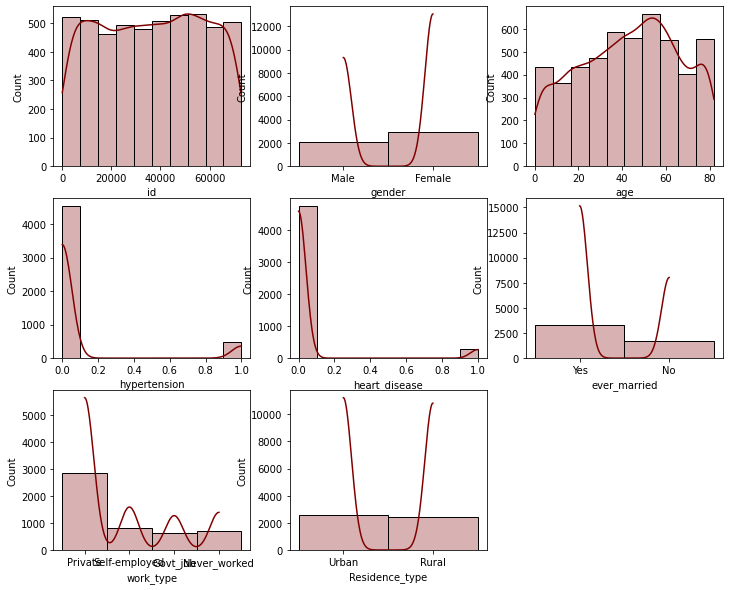

In [755]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:8]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],kde=True,alpha=0.3, bins=10, color='maroon',common_norm=False)

##### Countplot

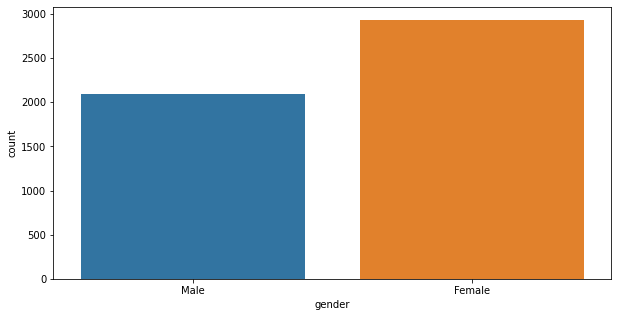

In [756]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)
plt.show()

###### Relation between 'Age' and 'Stroke'

*   According to age range

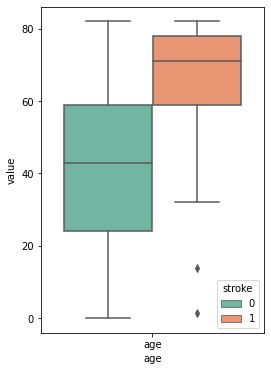

In [757]:
fig,ax = plt.subplots(figsize = (4,6))
#Create dataset that shows each age value and its corresponding stroke state
age_data= pd.concat([df['age'], df['stroke']], axis=1)

#Create dataset for the plot
age_plot= pd.melt(age_data, id_vars= 'stroke', var_name= 'age')

#Create the plot
sns.boxplot(x= 'age', y= 'value', hue= 'stroke', data= age_plot, palette="Set2")

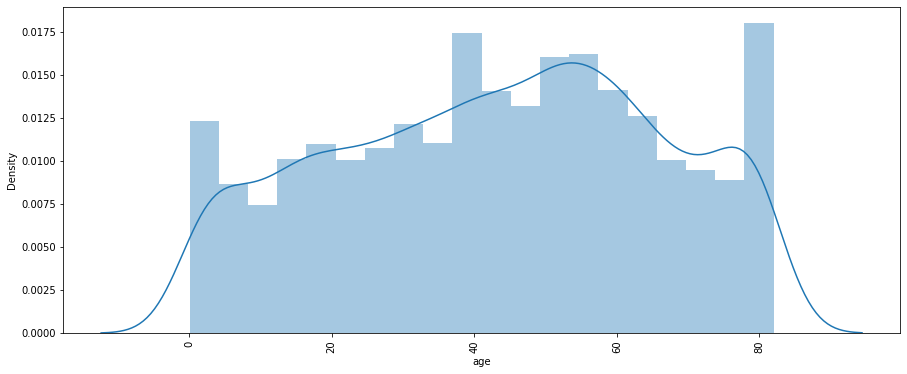

In [758]:
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.xticks(rotation=90)
plt.show()

* According to age category

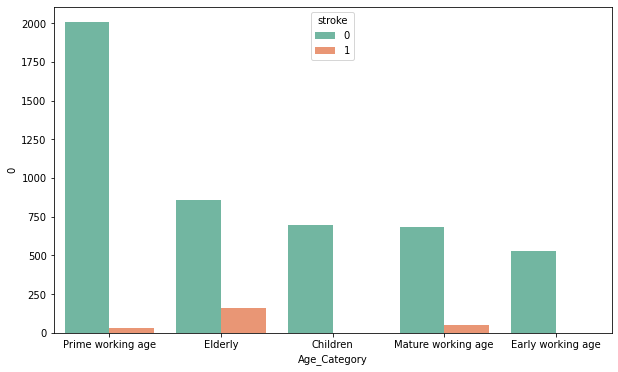

In [759]:
fig,ax = plt.subplots(figsize = (10,6))
#Create dataset that shows smoking state and its corresponding stroke state
agecat_data= pd.concat([df['Age_Category'], df['stroke']], axis=1)

#Create dataset for the plot
agecat_plot= df[['Age_Category', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'Age_Category', y= 0, hue= 'stroke', data= agecat_plot, palette="Set2")

*It's clear from the plot that older patients 'seniors' (>= 65 years) are more likely to have a stroke than younger people, so age is a crucial factor in predicting strokes.*

###### Relation between 'Glucose level' and 'Stroke'

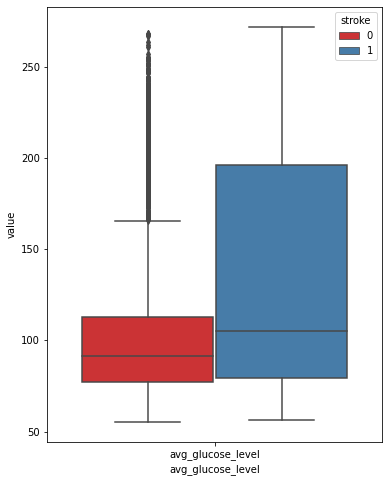

In [760]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each glucose level value and its corresponding stroke state
glucose_data= pd.concat([df['avg_glucose_level'], df['stroke']], axis=1)

#Create dataset for the plot
glucose_plot= pd.melt(glucose_data, id_vars= 'stroke', var_name= 'avg_glucose_level')

#Create the plot
sns.boxplot(x= 'avg_glucose_level', y= 'value', hue= 'stroke', data= glucose_plot, palette="Set1")

*From the visual, we can notice that higher glucose levels are associated with a higher risk of a stroke, also there're too many outliers.*

*Glucose levels ranging between 80-120 are not a precise indicator to predict a stroke since some patients with this glucose level had a stroke and others didn't.*

###### Relation between 'BMI' and 'Stroke'

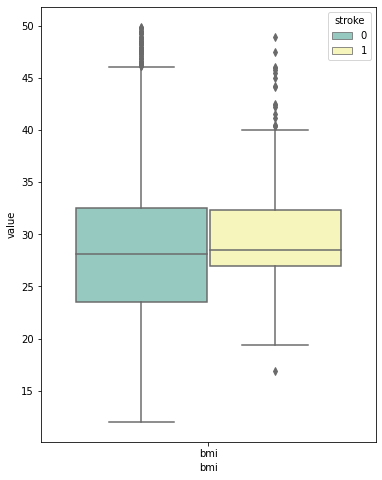

In [761]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each bmi value and its corresponding stroke state
bmi_data= pd.concat([df['bmi'], df['stroke']], axis=1)

#Create dataset for the plot
bmi_plot= pd.melt(bmi_data, id_vars= 'stroke', var_name= 'bmi')

#Create the plot
sns.boxplot(x= 'bmi', y= 'value', hue= 'stroke', data= bmi_plot, palette="Set3")

*We notice here that some patients with bmi ranging from (28-33) already had a stroke while others with the same bmi didn't, so bmi isn't necessarily correlated to a stroke.*

###### Relation between 'Gender' and 'Stroke'

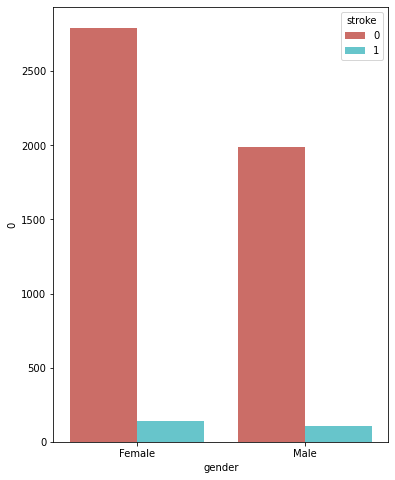

In [762]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each gender and its corresponding stroke state
gender_data= pd.concat([df['gender'], df['stroke']], axis=1)

#Create dataset for the plot
gender_plot= df[['gender', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'gender', y= 0, hue= 'stroke', data= gender_plot, palette="hls")

In [763]:
gender_plot= df[['gender', 'stroke']].value_counts().reset_index()
gender_plot.head()

,gender,stroke,0
0,Female,0,2793
1,Male,0,1986
2,Female,1,140
3,Male,1,108


*From the previous plot & table, it's clear that females (140) were more likely to have a stroke than males (108).*

###### Relation between 'Hypertension' and 'Stroke'

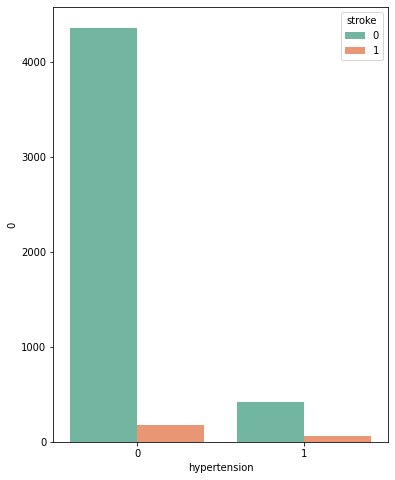

In [764]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows hypertension state and its corresponding stroke state
hypertn_data= pd.concat([df['hypertension'], df['stroke']], axis=1)

#Create dataset for the plot
hypertn_plot= df[['hypertension', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'hypertension', y= 0, hue= 'stroke', data= hypertn_plot, palette="Set2")

In [765]:
hypertn_plot= df[['hypertension', 'stroke']].value_counts().reset_index()
hypertn_plot.head(5)

,hypertension,stroke,0
0,0,0,4364
1,1,0,415
2,0,1,182
3,1,1,66


From the previous table, we notice that:
* 4364 patients are neither hypertensive nor had a stroke and that shows a significant relationship and that's also backed up by the hypertension score in the feature selection where it was the fourth most related feature to strokes.
* 415 patients are hypertensive but didn't have a stroke which means that hypertension isn't necessarily associated with strokes.
* 182 patients had a stroke but aren't hypertensive and that signifies that stroke isn't necessarily associated with hypertension.
* 66 patients both had a stroke and are hypertensive so there is a slightly positive correlation.

###### Relation between 'Heart disease' and 'Stroke'

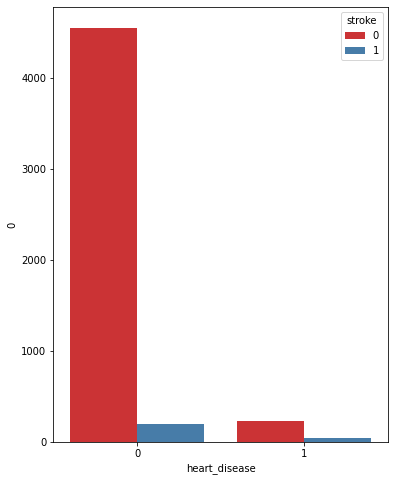

In [766]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows heart disease state and its corresponding stroke state
heart_data= pd.concat([df['heart_disease'], df['stroke']], axis=1)

#Create dataset for the plot
heart_plot= df[['heart_disease', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'heart_disease', y= 0, hue= 'stroke', data= heart_plot, palette="Set1")

In [767]:
heart_plot= df[['heart_disease', 'stroke']].value_counts().reset_index()
heart_plot.head()

,heart_disease,stroke,0
0,0,0,4551
1,1,0,228
2,0,1,201
3,1,1,47


From the previous, we notice that:
* 228 patients have heart disease but didn't have a stroke which implies that heart disease isn't significantly associated with strokes.
* 201 patients had a stroke but don't suffer from heart disease and that signifies that strokes aren't necessarily associated with heart disease.
* 47 patients both had a stroke and suffer from heart disease and 4551 neither had heart disease.

###### Relation between 'Marital status' and 'Stroke'

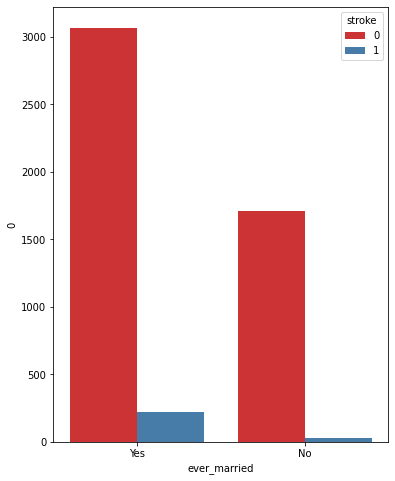

In [768]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows marital status and its corresponding stroke state
social_data= pd.concat([df['ever_married'], df['stroke']], axis=1)

#Create dataset for the plot
social_plot= df[['ever_married', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'ever_married', y= 0, hue= 'stroke', data= social_plot, palette="Set1")

In [769]:
social_plot= df[['ever_married', 'stroke']].value_counts().reset_index()
social_plot.head()

,ever_married,stroke,0
0,Yes,0,3068
1,No,0,1711
2,Yes,1,219
3,No,1,29


*The data shows that marriage is not strongly correlated to strokes.*

###### Relation between 'Work type' and 'Stroke'

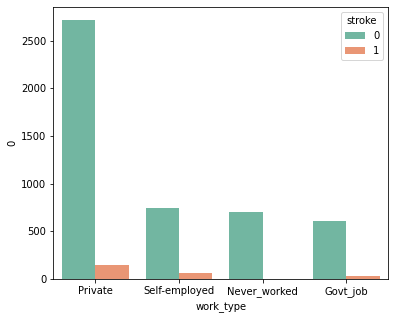

In [770]:
fig,ax = plt.subplots(figsize = (6,5))
#Create dataset that shows work type and its corresponding stroke state
work_data= pd.concat([df['work_type'], df['stroke']], axis=1)

#Create dataset for the plot
work_plot= df[['work_type', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'work_type', y= 0, hue= 'stroke', data= work_plot, palette="Set2")

In [771]:
work_plot= df[['work_type', 'stroke']].value_counts().reset_index()
work_plot.head(10)

,work_type,stroke,0
0,Private,0,2717
1,Self-employed,0,743
2,Never_worked,0,706
3,Govt_job,0,613
4,Private,1,148
5,Self-employed,1,65
6,Govt_job,1,33
7,Never_worked,1,2


*It's clear that the largest proportion of those who had a stroke is in the private sector (148), although it's not that big of a number it's worth taking into consideration.*

###### Relation between 'Residence type' and 'Stroke'

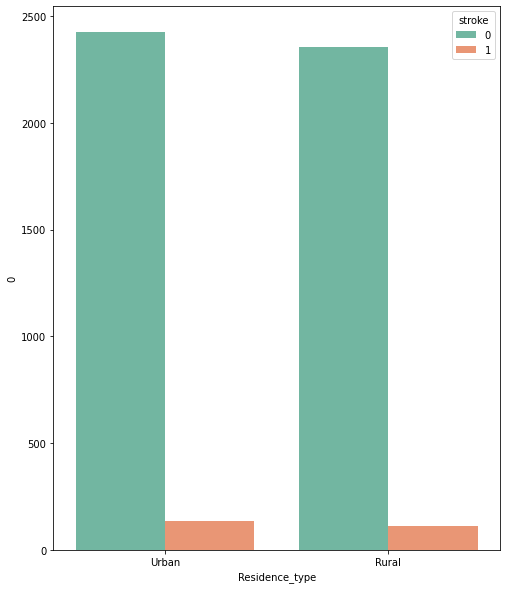

In [772]:
fig,ax = plt.subplots(figsize = (8,10))
#Create dataset that shows work type and its corresponding stroke state
residence_data= pd.concat([df['Residence_type'], df['stroke']], axis=1)

#Create dataset for the plot
residence_plot= df[['Residence_type', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'Residence_type', y= 0, hue= 'stroke', data= residence_plot, palette="Set2")

*It seems that residence type doesn't have a great effect on predicting strokes.*





######  Relation between 'Smoking status' and 'Stroke'

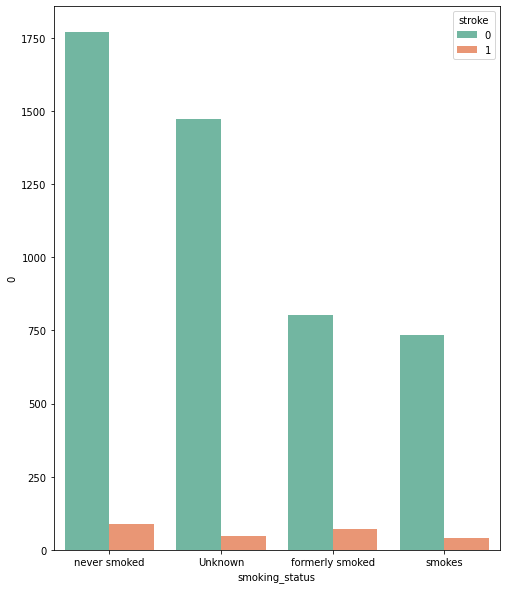

In [773]:
fig,ax = plt.subplots(figsize = (8,10))
#Create dataset that shows smoking state and its corresponding stroke state
smoking_data= pd.concat([df['smoking_status'], df['stroke']], axis=1)

#Create dataset for the plot
smoking_plot= df[['smoking_status', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'smoking_status', y= 0, hue= 'stroke', data= smoking_plot, palette="Set2")

In [774]:
smoking_plot= df[['smoking_status', 'stroke']].value_counts().reset_index()
smoking_plot.head(10)

,smoking_status,stroke,0
0,never smoked,0,1769
1,Unknown,0,1474
2,formerly smoked,0,801
3,smokes,0,735
4,never smoked,1,89
5,formerly smoked,1,70
6,Unknown,1,47
7,smokes,1,42


*The result here is quite interesting, it was expected that smokers have a higher risk of a stroke but the data shows that 735 smoker patients never experienced a stroke while 89 non-smokers already had a stroke, so unlike the usual, smoking status is not a good predictor of a stroke for these records.*

#### Cleaning the dataset

In [775]:
df.id.nunique()

5027

*The total number of unique ids is the same as the row count. I do not need another identifier. Thus, we will drop this column.*

In [776]:
# df.to_csv("/healthcare-dataset-stroke-data_cleaned.csv", index=False)

In [777]:
df['stroke'].value_counts()

0    4779
1     248
Name: stroke, dtype: int64

In [778]:
# deleting the unwanted column
df= df.drop(columns=['id'], axis=1)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6000,formerly smoked,1,Elderly
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.4567,never smoked,1,Mature working age
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5000,never smoked,1,Elderly
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4000,smokes,1,Prime working age
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0000,never smoked,1,Elderly


In [779]:
df.shape

(5027, 12)

In [780]:
#Shifting "Generation" column - Index location -1 or 12
cols = list(df.columns)
df = df[cols[0:10] + [cols[-1]]+ [cols[10]] ]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6000,formerly smoked,Elderly,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.4567,never smoked,Mature working age,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5000,never smoked,Elderly,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4000,smokes,Prime working age,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0000,never smoked,Elderly,1


####  Multicollinearity Analysis

*Since correlation checks only accept numerical variables, preprocessing the categorical variables becomes a necessary step, I need to convert these categorical variables to numbers encoded to 0 or 1. I use labelEncoder from sklearn. Preprocessing as it will be easy to decode a particular label back later after predicting if required.*

In [781]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['Age_Category'] = le.fit_transform(df['Age_Category'])

df_en = df
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6000,1,2,1
1,0,61.0,0,0,1,3,0,202.21,28.4567,2,3,1
2,1,80.0,0,1,1,2,0,105.92,32.5000,2,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4000,3,4,1
4,0,79.0,1,0,1,3,0,174.12,24.0000,2,2,1


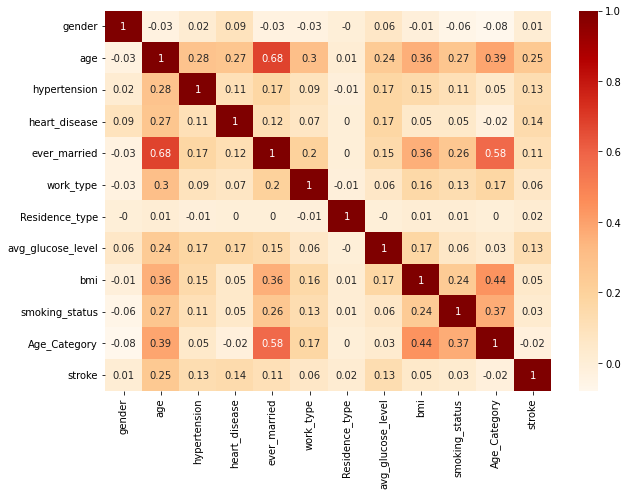

In [782]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

*From the above correlation matrix, I can verify the presence of multicollinearity between some of the variables. For instance, the ever_married and age column correlates 0.68. Between these two attributes, age contains more information on whether one is susceptible to stroke. Thus, I shall drop the ever_married column.*

In [783]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,1,67.0,0,1,2,1,228.69,36.6000,1,2,1
1,0,61.0,0,0,3,0,202.21,28.4567,2,3,1
2,1,80.0,0,1,2,0,105.92,32.5000,2,2,1
3,0,49.0,0,0,2,1,171.23,34.4000,3,4,1
4,0,79.0,1,0,3,0,174.12,24.0000,2,2,1


#### Finding top features

In [784]:
#Using the SelectKBest library to run a chi-squared statistical test & select the top 3 features that are most related to the output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X= df.iloc[:,0:11] #all features 
Y= df.iloc[:,-1] #target (stroke)

best_features= SelectKBest(score_func=chi2, k=3) #function that select the top 3 features.
fit= best_features.fit(X,Y) 

#Creating dataframes for the features and the score of each feature.
stroke_scores= pd.DataFrame(fit.scores_)
stroke_columns= pd.DataFrame(X.columns)

In [785]:
#Create a dataframe that combines all the features and their corresponding scores.
features_scores= pd.concat([stroke_columns, stroke_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
0,gender,0.224495
6,Residence_type,0.638709
10,Age_Category,1.077361
9,smoking_status,3.297721
5,work_type,7.492964
4,ever_married,20.957745
8,bmi,23.011244
2,hypertension,79.206269
3,heart_disease,86.667013
7,avg_glucose_level,1700.795167


## **From EDA an overall Conclusion**

This dataset has 5027 records and 13 columns representing 13 different clinical and demographic features.
From the analysis, the following points were concluded:
* Seniors have a higher risk of stroke compared to adults and youth, so it's a good indicator.
* The level of average glucose isn't correlated.
* BMI isn't highly related to a stroke and for this dataset can never be considered a risk factor for strokes.
* Gender data showed that both males and females have strokes but more females suffered from strokes than males.
* Hypertension is not correlated to strokes for this data since many hypertensive patients didn't have a stroke and others who don't do suffer from a stroke, the same conclusion applies for heart disease which surprisingly was not a probable risk factor.
* Marital status, residence type, and smoking status are all weakly related to strokes for this dataset.
* On the other hand, people working in the private sector showed a higher level of stroke than people with other work types, the number isn't significant but it's worth taking into consideration in further studies.

## Final Preprocessing

*Variables that are measured at different scales do not contribute equally to model fitting and might end up creating a bias. Thus, to deal with this potential problem feature standardization (μ=0, σ=1) is usually used before model fitting. I have created an object of StandardScaler() and then applied fit_transform() function to apply standardization on ‘avg_glucose_level’,’bmi’ and ‘age’ columns.*

In [786]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.729253,1.187357,1.047780
1,2.140685,0.000007,0.783713
2,0.000457,0.589548,1.619927
3,1.452096,0.866581,0.255577
4,1.516331,-0.649811,1.575915


In [787]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,Age_Category,stroke,avg_glucose_level,bmi,age
0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,2.729253,1.187357,1.047780
1,0.0,0.0,0.0,3.0,0.0,2.0,3.0,1.0,2.140685,0.000007,0.783713
2,1.0,0.0,1.0,2.0,0.0,2.0,2.0,1.0,0.000457,0.589548,1.619927
3,0.0,0.0,0.0,2.0,1.0,3.0,4.0,1.0,1.452096,0.866581,0.255577
4,0.0,1.0,0.0,3.0,0.0,2.0,2.0,1.0,1.516331,-0.649811,1.575915


In [788]:
df.isnull().sum()

gender               83
hypertension         83
heart_disease        83
work_type            83
Residence_type       83
smoking_status       83
Age_Category         83
stroke               83
avg_glucose_level    83
bmi                  83
age                  83
dtype: int64

In [789]:
df = df.fillna(df.mode().iloc[0])

In [790]:
df.isnull().sum()

gender               0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
smoking_status       0
Age_Category         0
stroke               0
avg_glucose_level    0
bmi                  0
age                  0
dtype: int64

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   hypertension       5110 non-null   float64
 2   heart_disease      5110 non-null   float64
 3   work_type          5110 non-null   float64
 4   Residence_type     5110 non-null   float64
 5   smoking_status     5110 non-null   float64
 6   Age_Category       5110 non-null   float64
 7   stroke             5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  age                5110 non-null   float64
dtypes: float64(11)
memory usage: 479.1 KB


## **Model Building**

In [792]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Splitting the Raw Data into Different Sections

*All the predictor variables will be mapped to an array x and the target variable to an array y. The target variable is the ‘stroke’ column.*

In [793]:
x=df.drop('stroke',axis=1)
x

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,Age_Category,avg_glucose_level,bmi,age
0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,2.729253,1.187357,1.047780
1,0.0,0.0,0.0,3.0,0.0,2.0,3.0,2.140685,0.000007,0.783713
2,1.0,0.0,1.0,2.0,0.0,2.0,2.0,0.000457,0.589548,1.619927
3,0.0,0.0,0.0,2.0,1.0,3.0,4.0,1.452096,0.866581,0.255577
4,0.0,1.0,0.0,3.0,0.0,2.0,2.0,1.516331,-0.649811,1.575915
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,1.0,0.0,2.0,1.0,2.0,2.0,-0.267155,0.000007,1.531904
5106,0.0,0.0,0.0,3.0,1.0,2.0,2.0,-0.267155,0.000007,1.531904
5107,0.0,0.0,0.0,3.0,0.0,2.0,4.0,-0.267155,0.000007,1.531904
5108,1.0,0.0,0.0,2.0,0.0,1.0,4.0,-0.267155,0.000007,1.531904


In [794]:
y=df['stroke']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

In [795]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3,
                                                    random_state=2022, stratify=y, shuffle=True)

### Shape of the train and test data

In [796]:
print(x_train.shape)
print(x_test.shape)

(3577, 10)
(1533, 10)


### Checking the distribution

In [797]:
# distribution in training set
y_train.value_counts(normalize=True)

0.0    0.951356
1.0    0.048644
Name: stroke, dtype: float64

In [798]:
# distribution in test set
y_test.value_counts(normalize=True)

0.0    0.951729
1.0    0.048271
Name: stroke, dtype: float64

### Train the ML models

Building models with their parameters and storing them in a dictionary. We will explore 7 algorithms to see which produces reliable and repeatable results.

The 7 algorithms are:

* Logistic Regression
* Random Forest
* Support Vector Machine
* K Nearest Neighbour
* Naive Bayes
* XGBoost
* AdaBoost

In [799]:
models = dict()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier(n_estimators = 250, random_state = 2022)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = BernoulliNB()
models['xgboost'] = XGBClassifier(max_depth= 8, n_estimators= 250, random_state= 2022,  learning_rate= 0.08, n_jobs=5)
models['AdaBoost'] = AdaBoostClassifier(learning_rate = 0.08, n_estimators = 250, random_state = 2022) 

In [800]:
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Logreg model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
xgboost model fitting completed.
AdaBoost model fitting completed.


### Evaluating the ML models

In [801]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print("Confusion matrix: -\n",confusion_matrix(**arg_test))
    print("\nClassification report: -\n",classification_report(**arg_test))

Test Set Prediction:

--------------------Logreg--------------------
Confusion matrix: -
 [[1457    2]
 [  70    4]]

Classification report: -
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1459
         1.0       0.67      0.05      0.10        74

    accuracy                           0.95      1533
   macro avg       0.81      0.53      0.54      1533
weighted avg       0.94      0.95      0.93      1533

--------------------Random Forest--------------------
Confusion matrix: -
 [[1451    8]
 [  63   11]]

Classification report: -
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1459
         1.0       0.58      0.15      0.24        74

    accuracy                           0.95      1533
   macro avg       0.77      0.57      0.61      1533
weighted avg       0.94      0.95      0.94      1533

--------------------Support Vector Machine--------------------
Confusion 

*Take note that recall can be thought of as a measure of a classifier's completeness. A low recall for stroke (1) indicates many False Negatives.*

### Accuracy score of the evaluated models

In [802]:
print('Summary of Accuracy Score: -\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score: -

Logreg Model:  0.953
Random Forest Model:  0.9537
Support Vector Machine Model:  0.9243
kNN Model:  0.9485
Naive Bayes Model:  0.9498
xgboost Model:  0.9517
AdaBoost Model:  0.953


*From the above accuracy summary, Logistic Regression, Random Forest, and AdaBoost models all give high accuracy score of a 0.95. However, it is also important to consider the error type and recall value of each model. Models with 0.95 accuracy score generally have high false negatives as shown in the confusion matrix. High false negative indicates type 2 error. For my study on stroke prediction, I want to avoid type 2 error as it means that I fail to identify subjects that have a stroke and deem them stroke free instead. Inspecting the classification report above, the XGBoost Model has fit our objective although the accuracy is 0.9517.*

### XGBoost Classifier Model

In [803]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(x_train, y_train)

classifier.score(x_test, y_test)

0.958904109589041

In [804]:
classifier.predict(x_test)
 
df.columns
 
pred = classifier.predict(x_test)

pred

array([0., 0., 0., ..., 0., 0., 0.])

In [805]:
if pred[0] == 0:
  print('A patient is not likely to get stroked')
else:
  print('A patient is likely to get stroked')

A patient is not likely to get stroked


### **Cross Validation**

In [806]:
from sklearn.model_selection import cross_val_score

In [807]:
from sklearn.model_selection import cross_val_score

XGB = XGBClassifier()

#### **XGBoost performance using cross_val_score**

In [808]:
scores = cross_val_score(XGB, x_train, y_train, cv = 10, scoring='accuracy')

In [809]:
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.95251397 0.96089385 0.94972067 0.94692737 0.94692737 0.95251397
 0.94413408 0.94957983 0.95238095 0.95238095]
Average cross-validation score: 0.9508


In [810]:
scores = cross_val_score(XGB, x_test, y_test, cv = 10, scoring='accuracy')

In [811]:
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.94155844 0.94805195 0.95454545 0.97385621 0.96078431 0.96732026
 0.96078431 0.96078431 0.96078431 0.93464052]
Average cross-validation score: 0.9563


* Using the mean cross-validation, I can conclude that I expect the model to be around 95.00% accurate on average.
* If I look at all the 10 scores produced by the 10-fold cross-validation, I can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 94.41% accuracy to 96.09% accuracy. So, I can conclude that the model is independent of the particular folds used for training.
* My original model accuracy is 95.17%, but the mean cross-validation accuracy is 95.08%. So, the 10-fold cross-validation accuracy does result in performance improvement for this model.

*Now if we have other patients with different ages, BMI, or glucose levels, the model can predict if they may have a stroke or not.*

In [812]:
x= df[['age', 'avg_glucose_level', 'bmi']]
y= df['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=2022) 

In [813]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(x_train, y_train)

classifier.score(x_test, y_test)

0.9535225048923679

In [814]:
classifier.predict(x_test)
 
df.columns
 
pred = classifier.predict(x_test)

pred

array([0., 0., 0., ..., 0., 0., 0.])

In [815]:
if pred[0] == 0:
  print('A patient is not likely to get stroked')
else:
  print('A patient is likely to get stroked')

A patient is not likely to get stroked


In [816]:
#This dataset is fictional and for illustrating only.
new_patients= {'age': [20, 35, 42, 45, 47, 53, 55, 65, 67, 68, 70, 72, 76, 77, 79, 80, 83, 84, 87, 89, 90, 92, 93, 96, 97, 99, 100, 105],
               'avg_glucose_level': [120, 140, 160, 200, 170, 150, 300, 90, 450, 310, 280, 370, 80,210,345,285,400,410,365,389,321,299,432,254,326,377,396,421],
               'bmi': [20, 25, 18, 30, 19, 31, 44, 15, 27, 48, 34, 39, 50, 48, 43, 36, 29, 38, 46, 45, 49, 41, 37, 38, 34, 46, 42, 31]}
stroke_new= pd.DataFrame(new_patients, columns= ['age', 'avg_glucose_level', 'bmi'])


In [817]:
pred = classifier.predict(stroke_new)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [818]:
if pred[0] == 0:
  print('A patient is not likely to get stroked')
else:
  print('A patient is likely to get stroked')

A patient is not likely to get stroked


## **Conclusion**

* The various model was used to predict whether a person is subjected to stroke. The XGBoost model yields a very good performance as indicated by the model accuracy which was found to be 95.17%.
* Using the mean cross-validation, I can conclude that I expect the model to be around 95.00% accurate on average.
* If I look at all the 10 scores produced by the 10-fold cross-validation, I can also conclude that there is a relatively small variance in the accuracy between folds, hence the model is independent of the particular folds used for training.
* My original model accuracy is 95.17% and the mean cross-validation accuracy is 95.00%. Thus, the 10-fold cross-validation accuracy does result in performance improvement for this model.
* The XGBoost model can be further improved by tuning hyperparameters to get a better result or adjusting the probability threshold to improve its performance.